## About Dataset
#### Dataset Information

This dataset contains information on default payments, demographic factors, credit data, history of payment, and bill statements of credit card clients in Taiwan from April 2005 to September 2005.

There are 25 variables:

1. **ID**: ID of each client
2. **LIMIT_BAL**: Amount of given credit in NT dollars (includes individual and family/supplementary credit
3. **SEX**: Gender (1=male, 2=female)
4. **EDUCATION**: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)
5. **MARRIAGE**: Marital status (1=married, 2=single, 3=others)
6. **AGE**: Age in years
7. **PAY_0**: Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, … 8=payment delay for eight months, 9=payment delay for nine months and above)
8. **PAY_2** : Repayment status in August, 2005 (scale same as above)
9. **PAY_3** : Repayment status in July, 2005 (scale same as above)
10. **PAY_4**: Repayment status in June, 2005 (scale same as above)
11. **PAY_5**: Repayment status in May, 2005 (scale same as above)
12. **PAY_6**: Repayment status in April, 2005 (scale same as above)
13. **BILL_AMT1**: Amount of bill statement in September, 2005 (NT dollar)
14. **BILL_AMT2**: Amount of bill statement in August, 2005 (NT dollar)
15. **BILL_AMT3**: Amount of bill statement in July, 2005 (NT dollar)
16. **BILL_AMT4**: Amount of bill statement in June, 2005 (NT dollar)
17. **BILL_AMT5**: Amount of bill statement in May, 2005 (NT dollar)
18. **BILL_AMT6**: Amount of bill statement in April, 2005 (NT dollar)
19. **PAY_AMT1**: Amount of previous payment in September, 2005 (NT dollar)
20. **PAY_AMT2**: Amount of previous payment in August, 2005 (NT dollar)
21. **PAY_AMT3**: Amount of previous payment in July, 2005 (NT dollar)
22. **PAY_AMT4**: Amount of previous payment in June, 2005 (NT dollar)
23. **PAY_AMT5**: Amount of previous payment in May, 2005 (NT dollar)
24. **PAY_AMT6**: Amount of previous payment in April, 2005 (NT dollar)
25. **default.payment.next.month**: Default payment (1=yes, 0=no)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import statsmodels.formula.api as sm
import statsmodels.formula.api as smf
import plotly.express as px

In [3]:
# original_df = pd.read_excel('default of credit card clients.xls')
original_df = pd.read_excel('default_data.xls')
data = original_df.copy()
data.shape

(30001, 25)

In [4]:
data.head(2)

Unnamed: 0         X1   X2         X3        X4   X5     X6     X7     X8  \
0         ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3   
1          1      20000    2          2         1   24      2      2     -1   

      X9  ...        X15        X16        X17       X18       X19       X20  \
0  PAY_4  ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3   
1     -1  ...          0          0          0         0       689         0   

        X21       X22       X23                           Y  
0  PAY_AMT4  PAY_AMT5  PAY_AMT6  default payment next month  
1         0         0         0                           1  

[2 rows x 25 columns]

In [5]:
#Fixing column labels
data= data.set_axis(data.iloc[0], axis=1)
data = data.drop(data.index[0])
data.head(2)

0 ID LIMIT_BAL SEX EDUCATION MARRIAGE AGE PAY_0 PAY_2 PAY_3 PAY_4  ...  \
1  1     20000   2         2        1  24     2     2    -1    -1  ...   
2  2    120000   2         2        2  26    -1     2     0     0  ...   

0 BILL_AMT4 BILL_AMT5 BILL_AMT6 PAY_AMT1 PAY_AMT2 PAY_AMT3 PAY_AMT4 PAY_AMT5  \
1         0         0         0        0      689        0        0        0   
2      3272      3455      3261        0     1000     1000     1000        0   

0 PAY_AMT6 default payment next month  
1        0                          1  
2     2000                          1  

[2 rows x 25 columns]

In [6]:
## Dropping ID since it is useless here
data.drop(columns=['ID'], inplace=True)

In [7]:
## making columns lowercase
data.columns = data.columns.str.lower()
data.columns

Index(['limit_bal', 'sex', 'education', 'marriage', 'age', 'pay_0', 'pay_2',
       'pay_3', 'pay_4', 'pay_5', 'pay_6', 'bill_amt1', 'bill_amt2',
       'bill_amt3', 'bill_amt4', 'bill_amt5', 'bill_amt6', 'pay_amt1',
       'pay_amt2', 'pay_amt3', 'pay_amt4', 'pay_amt5', 'pay_amt6',
       'default payment next month'],
      dtype='object', name=0)

In [8]:
#cleaning column names
new_names = {'pay_0': 'repay_status_sept', 'pay_2': 'repay_status_aug', 'pay_3': 'repay_status_jul', 
             'pay_4': 'repay_status_jun', 'pay_5': 'repay_status_may', 'pay_6': 'repay_status_apr',
            'bill_amt1': 'bill_sept', 'bill_amt2': 'bill_aug', 'bill_amt3': 'bill_jul', 'bill_amt4': 'bill_jun',
            'bill_amt5': 'bill_may', 'bill_amt6': 'bill_apr', 'pay_amt1': 'pay_amt_sept', 'pay_amt2': 'pay_amt_aug',
            'pay_amt3': 'pay_amt_jul', 'pay_amt4': 'pay_amt_jun', 'pay_amt5': 'pay_amt_may', 'pay_amt6': 'pay_amt_apr',
            'default payment next month': 'defaulted'}
data.rename(columns=new_names, inplace=True)

In [9]:
data.head(5)

0 limit_bal sex education marriage age repay_status_sept repay_status_aug  \
1     20000   2         2        1  24                 2                2   
2    120000   2         2        2  26                -1                2   
3     90000   2         2        2  34                 0                0   
4     50000   2         2        1  37                 0                0   
5     50000   1         2        1  57                -1                0   

0 repay_status_jul repay_status_jun repay_status_may  ... bill_jun bill_may  \
1               -1               -1               -2  ...        0        0   
2                0                0                0  ...     3272     3455   
3                0                0                0  ...    14331    14948   
4                0                0                0  ...    28314    28959   
5               -1                0                0  ...    20940    19146   

0 bill_apr pay_amt_sept pay_amt_aug pay_amt_jul pay_amt_jun pay_amt_may  \
1        0            0         689           0           0           0   
2     3261            0        1000        1000        1000           0   
3    15549         1518        1500        1000        1000        1000   
4    29547         2000        2019        1200        1100        1069   
5    19131         2000       36681       10000        9000         689   

0 pay_amt_apr defaulted  
1           0         1  
2        2000         1  
3        5000         0  
4        1000         0  
5         679         0  

[5 rows x 24 columns]

**Dependent Variable Info**

<AxesSubplot:xlabel='defaulted', ylabel='count'>

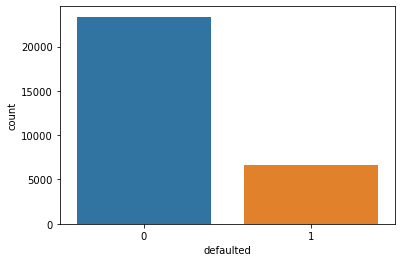

In [10]:
sns.countplot(x = 'defaulted', data = data)

In [11]:
# a lot more people who have not defaulted vs those who have - data is imbalanced - use SMOTE?

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 1 to 30000
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   limit_bal          30000 non-null  object
 1   sex                30000 non-null  object
 2   education          30000 non-null  object
 3   marriage           30000 non-null  object
 4   age                30000 non-null  object
 5   repay_status_sept  30000 non-null  object
 6   repay_status_aug   30000 non-null  object
 7   repay_status_jul   30000 non-null  object
 8   repay_status_jun   30000 non-null  object
 9   repay_status_may   30000 non-null  object
 10  repay_status_apr   30000 non-null  object
 11  bill_sept          30000 non-null  object
 12  bill_aug           30000 non-null  object
 13  bill_jul           30000 non-null  object
 14  bill_jun           30000 non-null  object
 15  bill_may           30000 non-null  object
 16  bill_apr           30000 non-null  objec

In [13]:
data.columns

Index(['limit_bal', 'sex', 'education', 'marriage', 'age', 'repay_status_sept',
       'repay_status_aug', 'repay_status_jul', 'repay_status_jun',
       'repay_status_may', 'repay_status_apr', 'bill_sept', 'bill_aug',
       'bill_jul', 'bill_jun', 'bill_may', 'bill_apr', 'pay_amt_sept',
       'pay_amt_aug', 'pay_amt_jul', 'pay_amt_jun', 'pay_amt_may',
       'pay_amt_apr', 'defaulted'],
      dtype='object', name=0)

In [14]:
## Converting columns to numeric:# Iterate over the columns in the DataFrame
for column in data.columns:
    # Check if the column can be converted to a float
    if '\.' in data[column]:
        # If the column contains decimal points, convert it to a float
        data[column] = data[column].astype(float)
    else:
        # If the column does not contain decimal points, convert it to an integer
        data[column] = data[column].astype(int)

In [15]:
data.dtypes

0
limit_bal            int32
sex                  int32
education            int32
marriage             int32
age                  int32
repay_status_sept    int32
repay_status_aug     int32
repay_status_jul     int32
repay_status_jun     int32
repay_status_may     int32
repay_status_apr     int32
bill_sept            int32
bill_aug             int32
bill_jul             int32
bill_jun             int32
bill_may             int32
bill_apr             int32
pay_amt_sept         int32
pay_amt_aug          int32
pay_amt_jul          int32
pay_amt_jun          int32
pay_amt_may          int32
pay_amt_apr          int32
defaulted            int32
dtype: object

In [16]:
data.shape

(30000, 24)

In [17]:
# no null values

In [18]:
data2 = data.copy()

In [19]:
y = data2['defaulted'].copy()
X = data2.drop('defaulted', axis=1).copy()

In [20]:
# Print the number of unique values and their counts for each column
for column in X.columns:
    print(f"{column}: {X[column].nunique()}")

limit_bal: 81
sex: 2
education: 7
marriage: 4
age: 56
repay_status_sept: 11
repay_status_aug: 11
repay_status_jul: 11
repay_status_jun: 11
repay_status_may: 10
repay_status_apr: 10
bill_sept: 22723
bill_aug: 22346
bill_jul: 22026
bill_jun: 21548
bill_may: 21010
bill_apr: 20604
pay_amt_sept: 7943
pay_amt_aug: 7899
pay_amt_jul: 7518
pay_amt_jun: 6937
pay_amt_may: 6897
pay_amt_apr: 6939


**Observations**:
1. Since sex is binary and only has 2 unique values - don't need to worry about encoding this variable
2. Why do education and marriage have 7 and 4 unique values respectively?

In [21]:
## analyzing education values
X['education'].value_counts()

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: education, dtype: int64

In [22]:
## I will combine 5,6, and 0 with the unknown category (4)
X['education'] = X['education'].replace({5: 4, 6: 4, 0: 4})
X['education'].value_counts()

2    14030
1    10585
3     4917
4      468
Name: education, dtype: int64

In [23]:
# analyzing marriage values
X['marriage'].value_counts()

2    15964
1    13659
3      323
0       54
Name: marriage, dtype: int64

In [24]:
#combining 0 with others category (3)
X['marriage'] = X['marriage'].replace({0: 3})
X['marriage'].value_counts()

2    15964
1    13659
3      377
Name: marriage, dtype: int64

In [25]:
## Encoding education and marriage since they are unordered nominal features
education_onehot = pd.get_dummies(X['education'], prefix='education')

# Rename the education columns with the corresponding education levels
education_levels = {
    'education_1': 'graduate_school',
    'education_2': 'university',
    'education_3': 'high_school',
    'education_4': 'others_education'
}
education_onehot = education_onehot.rename(columns=education_levels)

# Concatenate the one-hot encoded columns with the original DataFrame
X = pd.concat([X, education_onehot], axis=1)

# Remove the original "education" column
X = X.drop(['education'], axis=1)

marriage_onehot = pd.get_dummies(X['marriage'], prefix='marriage')

# Rename the marriage columns with the corresponding marital statuses
marital_statuses = {
    'marriage_1': 'married',
    'marriage_2': 'single',
    'marriage_3': 'others_married'
}
marriage_onehot = marriage_onehot.rename(columns=marital_statuses)

# Concatenate the one-hot encoded columns with the original DataFrame
X = pd.concat([X, marriage_onehot], axis=1)

# Remove the original "marriage" column
X = X.drop(['marriage'], axis=1)

In [26]:
X.head()

limit_bal  sex  age  repay_status_sept  repay_status_aug  repay_status_jul  \
1      20000    2   24                  2                 2                -1   
2     120000    2   26                 -1                 2                 0   
3      90000    2   34                  0                 0                 0   
4      50000    2   37                  0                 0                 0   
5      50000    1   57                 -1                 0                -1   

   repay_status_jun  repay_status_may  repay_status_apr  bill_sept  ...  \
1                -1                -2                -2       3913  ...   
2                 0                 0                 2       2682  ...   
3                 0                 0                 0      29239  ...   
4                 0                 0                 0      46990  ...   
5                 0                 0                 0       8617  ...   

   pay_amt_jun  pay_amt_may  pay_amt_apr  graduate_school  university  \
1            0            0            0                0           1   
2         1000            0         2000                0           1   
3         1000         1000         5000                0           1   
4         1100         1069         1000                0           1   
5         9000          689          679                0           1   

   high_school  others_education  married  single  others_married  
1            0                 0        1       0               0  
2            0                 0        0       1               0  
3            0                 0        0       1               0  
4            0                 0        1       0               0  
5            0                 0        1       0               0  

[5 rows x 28 columns]

In [27]:
X.shape

(30000, 28)

In [28]:
#applying a standard scaler to the data to give values more equal weight between columns
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

In [29]:
X.head()

limit_bal       sex       age  repay_status_sept  repay_status_aug  \
0  -1.136720  0.810161 -1.246020           1.794564          1.782348   
1  -0.365981  0.810161 -1.029047          -0.874991          1.782348   
2  -0.597202  0.810161 -0.161156           0.014861          0.111736   
3  -0.905498  0.810161  0.164303           0.014861          0.111736   
4  -0.905498 -1.234323  2.334029          -0.874991          0.111736   

   repay_status_jul  repay_status_jun  repay_status_may  repay_status_apr  \
0         -0.696663         -0.666599         -1.530046         -1.486041   
1          0.138865          0.188746          0.234917          1.992316   
2          0.138865          0.188746          0.234917          0.253137   
3          0.138865          0.188746          0.234917          0.253137   
4         -0.696663          0.188746          0.234917          0.253137   

   bill_sept  ...  pay_amt_jun  pay_amt_may  pay_amt_apr  graduate_school  \
0  -0.642501  ...    -0.308063    -0.314136    -0.293382        -0.738375   
1  -0.659219  ...    -0.244230    -0.314136    -0.180878        -0.738375   
2  -0.298560  ...    -0.244230    -0.248683    -0.012122        -0.738375   
3  -0.057491  ...    -0.237846    -0.244166    -0.237130        -0.738375   
4  -0.578618  ...     0.266434    -0.269039    -0.255187        -0.738375   

   university  high_school  others_education   married    single  \
0      1.0669    -0.442752         -0.125886  1.093780 -1.066471   
1      1.0669    -0.442752         -0.125886 -0.914261  0.937672   
2      1.0669    -0.442752         -0.125886 -0.914261  0.937672   
3      1.0669    -0.442752         -0.125886  1.093780 -1.066471   
4      1.0669    -0.442752         -0.125886  1.093780 -1.066471   

   others_married  
0       -0.112812  
1       -0.112812  
2       -0.112812  
3       -0.112812  
4       -0.112812  

[5 rows x 28 columns]

In [30]:
X['defaulted'] = y.reset_index(drop=True)

In [31]:
X['defaulted'].value_counts()

0    23364
1     6636
Name: defaulted, dtype: int64

In [32]:
X.shape

(30000, 29)

**Model Assumptions**:
1. Multicollinearity

<AxesSubplot:title={'center':'Credit Card Data Heatmap'}>

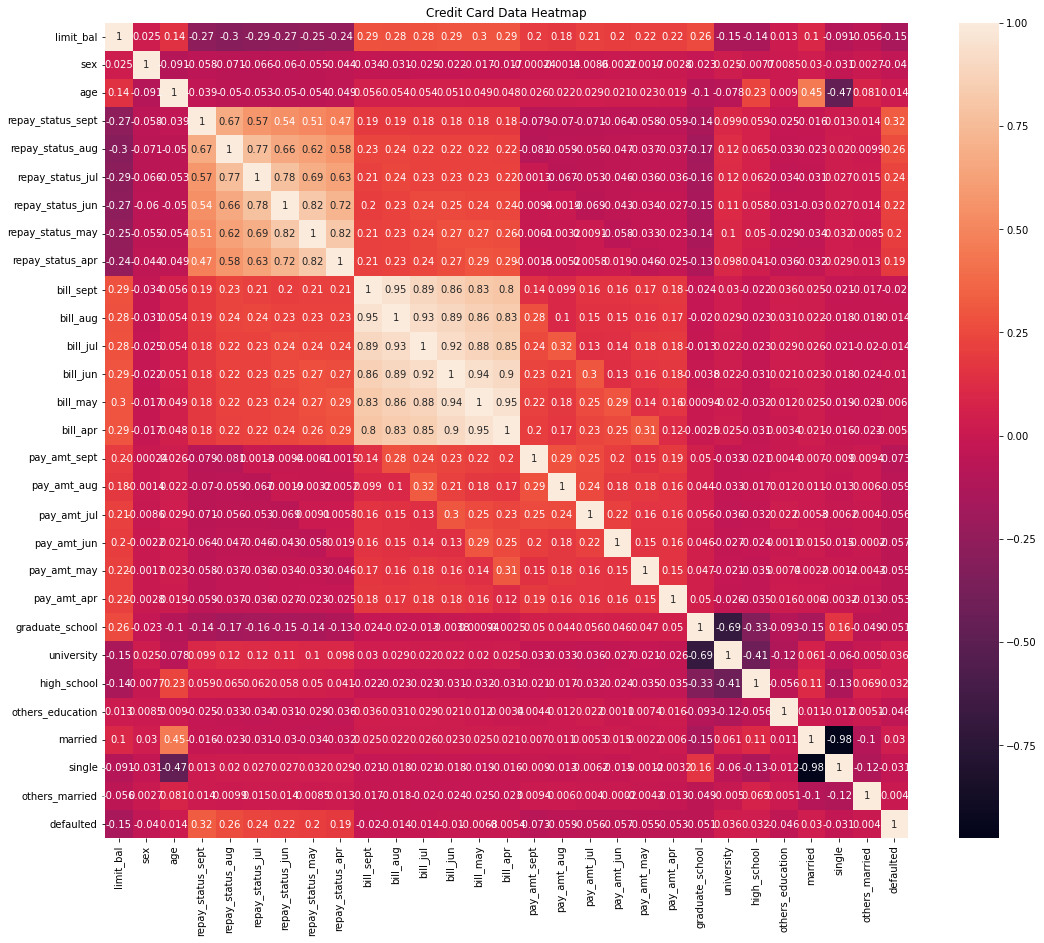

In [33]:
## Visualize using correlation
corr = X.corr()
plt.figure(figsize=(18,15))
plt.title('Credit Card Data Heatmap')
sns.heatmap(corr,annot=True)

**Observations**:
1. credit card bill statement amounts for each month are highly correlated with each other
2. Repayment status for each month is high correlcated with one another
3. No strong correlations between default outcome and any potential predictor variables.
4. Potential Multicollinearity issues but don't want to remove for now as they could be useful predictors

**Outlier removal** 
1. removes half of the dataset
2. I'm commenting this out for now

In [34]:
## plot to visualize outliers of different variables
fig = px.box(X, x='defaulted',y = X['bill_may'])
fig.show()

In [35]:
#def find_outliers_IQR(df):

   #q1=df.quantile(0.25)

   #q3=df.quantile(0.75)

   #IQR=q3-q1

   #outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]

   #return outliers

In [36]:
#def drop_outliers(df, columns):
    #for col in columns:
        #q1 = df[col].quantile(0.25)
        #q3 = df[col].quantile(0.75)
        #iqr = q3 - q1
        #outliers = df[(df[col] < (q1 - 1.5*iqr)) | (df[col] > (q3 + 1.5*iqr))].index
        #df.drop(outliers, inplace=True)
    #return df
#columns_to_drop_outliers = ['limit_bal','bill_sept','bill_aug','bill_jul','bill_jun','bill_may','bill_apr','pay_amt_sept',
          #'pay_amt_aug', 'pay_amt_jul', 'pay_amt_jun', 'pay_amt_may','pay_amt_apr','age']
#X = drop_outliers(X, columns_to_drop_outliers)

**Feature Selection**

In [37]:
Xf = X.drop('defaulted', axis=1).values
yf = X['defaulted']

yf = yf.astype(int)
print(Xf.shape)
print(yf.shape)

(30000, 28)
(30000,)


In [38]:
## Tree-Based estimators
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=42,criterion='entropy',max_depth=10)
dt.fit(Xf,yf)

DecisionTreeClassifier(criterion='entropy', max_depth=10, random_state=42)

In [39]:
##Running Feature Importance
fi_col = []
fi = []
for i,column in enumerate(X.drop('defaulted',axis=1)):
    print("The feature importance for {} is : {}".format(column,dt.feature_importances_[i]))
    fi_col.append(column)
    fi.append(dt.feature_importances_[i])

The feature importance for limit_bal is : 0.0550959741694055
The feature importance for sex is : 0.0014437129602246903
The feature importance for age is : 0.023545790473407664
The feature importance for repay_status_sept is : 0.4314265308582097
The feature importance for repay_status_aug is : 0.10613519698070646
The feature importance for repay_status_jul is : 0.013204773254106131
The feature importance for repay_status_jun is : 0.008088911571971636
The feature importance for repay_status_may is : 0.018639654880334294
The feature importance for repay_status_apr is : 0.014710476179457869
The feature importance for bill_sept is : 0.05335358007125845
The feature importance for bill_aug is : 0.014902726456923301
The feature importance for bill_jul is : 0.01850880155366305
The feature importance for bill_jun is : 0.012494864935063807
The feature importance for bill_may is : 0.017325282056279902
The feature importance for bill_apr is : 0.021531901421073408
The feature importance for pay_amt_

In [40]:
## Creating a dataframe
fi_df = zip(fi_col,fi)
fi_df = pd.DataFrame(fi_df,columns=['Feature','Feature Importance'])
fi_df.sort_values('Feature Importance',ascending=False).reset_index()

index            Feature  Feature Importance
0       3  repay_status_sept            0.431427
1       4   repay_status_aug            0.106135
2      17        pay_amt_jul            0.062412
3       0          limit_bal            0.055096
4       9          bill_sept            0.053354
5      16        pay_amt_aug            0.028930
6      15       pay_amt_sept            0.025312
7       2                age            0.023546
8      14           bill_apr            0.021532
9      20        pay_amt_apr            0.019691
10     19        pay_amt_may            0.018979
11     18        pay_amt_jun            0.018769
12      7   repay_status_may            0.018640
13     11           bill_jul            0.018509
14     13           bill_may            0.017325
15     10           bill_aug            0.014903
16      8   repay_status_apr            0.014710
17      5   repay_status_jul            0.013205
18     12           bill_jun            0.012495
19      6   repay_status_jun            0.008089
20     24   others_education            0.004493
21     23        high_school            0.003786
22     25            married            0.003146
23     22         university            0.001876
24      1                sex            0.001444
25     21    graduate_school            0.000812
26     27     others_married            0.000762
27     26             single            0.000623

**Observations**
1. No columns at 0 so won't remove anything from model

In [41]:
from sklearn.model_selection import train_test_split

# Split the dataset into features (X) and target variable (y)
X1 = X.drop('defaulted', axis=1)
y1 = X['defaulted']

# Split the dataset into training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.25, random_state=42)

In [42]:
X_train['defaulted'] = y_train
X_test['defaulted'] = y_test

C:\Users\17145\AppData\Local\Temp/ipykernel_22664/3113273361.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\17145\AppData\Local\Temp/ipykernel_22664/3113273361.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [43]:
X_train.corrwith(X_train.defaulted)

limit_bal           -0.155089
sex                 -0.042293
age                  0.016513
repay_status_sept    0.328366
repay_status_aug     0.269945
repay_status_jul     0.242426
repay_status_jun     0.223098
repay_status_may     0.207356
repay_status_apr     0.191065
bill_sept           -0.018842
bill_aug            -0.012714
bill_jul            -0.013317
bill_jun            -0.010722
bill_may            -0.007522
bill_apr            -0.005964
pay_amt_sept        -0.067232
pay_amt_aug         -0.055407
pay_amt_jul         -0.055817
pay_amt_jun         -0.054020
pay_amt_may         -0.051467
pay_amt_apr         -0.055072
graduate_school     -0.056213
university           0.040957
high_school          0.032314
others_education    -0.044349
married              0.029904
single              -0.030538
others_married       0.003093
defaulted            1.000000
dtype: float64

In [44]:
logit_model = sm.logit(formula = 'defaulted~age+limit_bal+repay_status_sept*repay_status_aug*repay_status_jul+pay_amt_jul', data = X_train).fit() #Developing logistic regression model
logit_model.summary()

Optimization terminated successfully.
         Current function value: 0.456998
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              defaulted   No. Observations:                22500
Model:                          Logit   Df Residuals:                    22489
Method:                           MLE   Df Model:                           10
Date:                Tue, 28 Feb 2023   Pseudo R-squ.:                  0.1381
Time:                        16:56:23   Log-Likelihood:                -10282.
converged:                       True   LL-Null:                       -11930.
Covariance Type:            nonrobust   LLR p-value:                     0.000
=======================================================================================================================
                                                          coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------
Intercept                                              -1.6539      0.022    -75.149      0.000      -1.697      -1.611
age                                                     0.0871      0.017      5.075      0.000       0.053       0.121
limit_bal                                              -0.2239      0.021    -10.619      0.000      -0.265      -0.183
repay_status_sept                                       0.7818      0.025     31.340      0.000       0.733       0.831
repay_status_aug                                       -0.0705      0.036     -1.980      0.048      -0.140      -0.001
repay_status_sept:repay_status_aug                      0.1529      0.028      5.381      0.000       0.097       0.209
repay_status_jul                                        0.1261      0.033      3.865      0.000       0.062       0.190
repay_status_sept:repay_status_jul                      0.0493      0.032      1.526      0.127      -0.014       0.113
repay_status_aug:repay_status_jul                       0.1953      0.017     11.553      0.000       0.162       0.228
repay_status_sept:repay_status_aug:repay_status_jul    -0.0899      0.004    -21.140      0.000      -0.098      -0.082
pay_amt_jul                                            -0.1004      0.032     -3.121      0.002      -0.163      -0.037
=======================================================================================================================
"""

C:\Users\17145\AppData\Local\Temp/ipykernel_22664/1016935965.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Text(0.5, 0, 'limit_bal_bin')

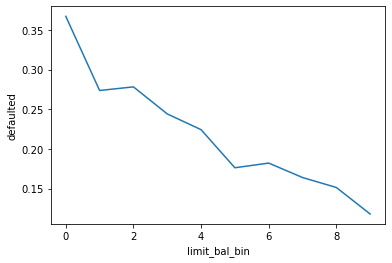

In [45]:
# looking for transformations that can help with model
# Binning limit_bal
binned_limit_bal = pd.qcut(X_train['limit_bal'], 10, retbins=True)
X_train['limit_bal_binned'] = binned_limit_bal[0]

# Finding percentage of people defaulting based on limit_bal 
limit_bal_data = X_train.groupby('limit_bal_binned').mean()['defaulted'].reset_index()

# Visualizing percentage of people having defaults with increasing limit_bal
sns.lineplot(x = limit_bal_data.index, y= limit_bal_data['defaulted'])
plt.xlabel('limit_bal_bin')

C:\Users\17145\AppData\Local\Temp/ipykernel_22664/1410858024.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Text(0.5, 0, 'age_bin')

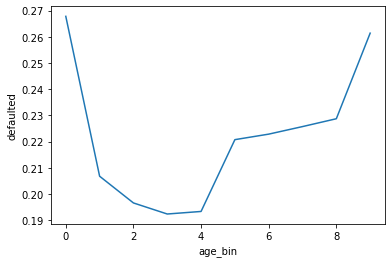

In [46]:
# looking for transformations that can help with model
# adding a quadratic transformation with age can help, but it turns out the transformation variable becomes insignificant
# Binning age
binned_age = pd.qcut(X_train['age'], 10, retbins=True)
X_train['age_binned'] = binned_age[0]

# Finding percentage of people defaulting based on age
age_data = X_train.groupby('age_binned').mean()['defaulted'].reset_index()

# Visualizing percentage of people having defaults with increasing age
sns.lineplot(x = age_data.index, y= age_data['defaulted'])
plt.xlabel('age_bin')

<AxesSubplot:xlabel='age'>

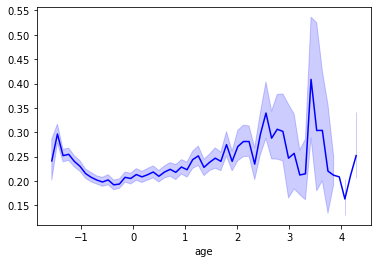

In [47]:
# not an obvious transformation to be done here
sns.lineplot(x = 'age', y= logit_model.predict(X_train), data = X_train, color = 'blue')

C:\Users\17145\AppData\Local\Temp/ipykernel_22664/3850443604.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Text(0.5, 0, 'pay_amt_jul_bin')

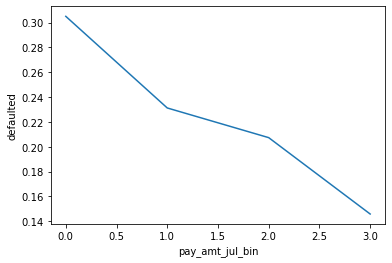

In [48]:
# looking for transformations that can help with model
# (trend is linear)
# Binning pay_amt_jul
binned_pay_amt_jul = pd.qcut(X_train['pay_amt_jul'], 4, retbins=True)
X_train['pay_amt_jul_binned'] = binned_pay_amt_jul[0]

# Finding percentage of people defaulting based on pay_amt_jul
pay_amt_jul_data = X_train.groupby('pay_amt_jul_binned').mean()['defaulted'].reset_index()

# Visualizing percentage of people having defaults with increasing pay_amt_jul
sns.lineplot(x = pay_amt_jul_data.index, y= pay_amt_jul_data['defaulted'])
plt.xlabel('pay_amt_jul_bin')

In [91]:
# drop bins
X_train = X_train.drop(columns=['limit_bal_binned', 'age_binned', 'pay_amt_jul_binned'])

In [92]:
#Function to compute confusion matrix and prediction accuracy on test data
def confusion_matrix_test(data,actual_values,model,cutoff=0.5):
#Predict the values using the Logit model
    pred_values = model.predict(data)
# Specify the bins
    bins=np.array([0,cutoff,1])
#Confusion matrix
    cm = np.histogram2d(actual_values, pred_values, bins=bins)[0]
    cm_df = pd.DataFrame(cm)
    cm_df.columns = ['Predicted 0','Predicted 1']
    cm_df = cm_df.rename(index={0: 'Actual 0',1:'Actual 1'})
    accuracy = (cm[0,0]+cm[1,1])/cm.sum()
    recall = cm[1,1]/(cm[1,1]+cm[1,0])
    precision = cm[1,1]/(cm[1,1]+cm[0,1])
    sns.heatmap(cm_df, annot=True, cmap='Blues', fmt='g')
    plt.ylabel("Actual Values")
    plt.xlabel("Predicted Values")
    print("Classification accuracy = {:.1%}".format(accuracy))
    print("Recall = {:.1%}".format(recall))
    print("Precision = {:.1%}".format(precision))

In the context, the errors have the following meanings:
- False Positive: the bank will reject a customer who does not default payment **thus face the consequence of losing a customer**
- False Negative: the bank will accept a customer who default payment **thus face the consequence of defaulting**

In the context, the cost of defaulting will be more significant to the bank than the cost of losing a customer; which means that the bank want to minimize `False Negative`, to maximize `recall`, and would be willing to do so with the tradeoff of an decrease in precision. 

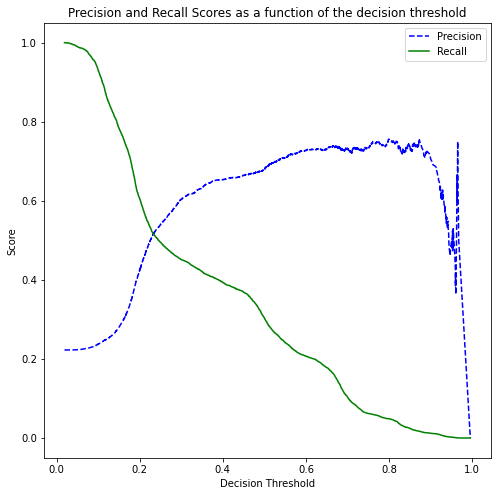

In [93]:
from sklearn.metrics import precision_recall_curve
y=y_train
ypred = logit_model.predict(X_train)
p, r, thresholds = precision_recall_curve(y, ypred)
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.figure(figsize=(8, 8))
    plt.title("Precision and Recall Scores as a function of the decision threshold")
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    plt.ylabel("Score")
    plt.xlabel("Decision Threshold")
    plt.legend(loc='best')
    plt.legend()
plot_precision_recall_vs_threshold(p, r, thresholds)

0.7234038247477221


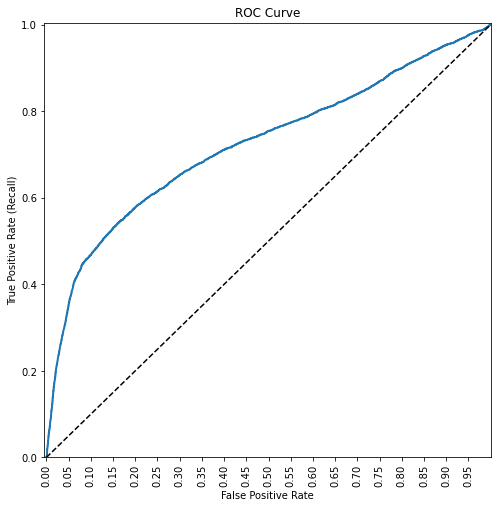

In [94]:
from sklearn.metrics import roc_curve, auc
y=y_train
ypred = logit_model.predict(X_train)
fpr, tpr, auc_thresholds = roc_curve(y, ypred)
print(auc(fpr, tpr))# AUC of ROC
def plot_roc_curve(fpr, tpr, label=None):
    plt.figure(figsize=(8,8))
    plt.title('ROC Curve')
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([-0.005, 1, 0, 1.005])
    plt.xticks(np.arange(0,1, 0.05), rotation=90)
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate (Recall)")

fpr, tpr, auc_thresholds = roc_curve(y, ypred)
plot_roc_curve(fpr, tpr)

Classification accuracy = 40.7%
Recall = 85.1%
Precision = 25.3%


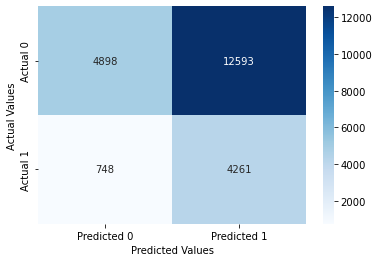

In [95]:
confusion_matrix_test(X_train,y_train,logit_model, 0.125)

Classification accuracy = 39.8%
Recall = 84.8%
Precision = 24.4%


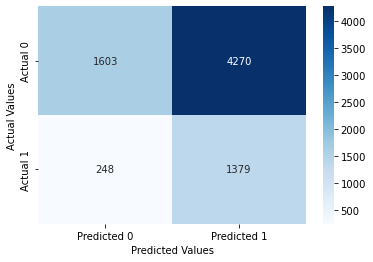

In [96]:
confusion_matrix_test(X_test,y_test,logit_model, 0.125)

Based on the profit and loss associated with client default payment, and the model developed, there exists an  decision threshold probability of classification such that the net profit is maximized. However, the loss of default payment and profit from unit increase in number of client who repays regularly is unknown and varies based on other information and data.

In [163]:
# create predictors to find the best predictor
X_best = X_train[X_train.columns]

# drop y variable 
X_best = X_best.drop(columns = ['defaulted'])

# import necessary packages
import itertools
import time

In [164]:
#Function to develop a model based on all predictors in predictor_subset

def processSubset(predictor_subset):
    # Fit model on feature_set and calculate R-squared
    model = sm.logit('defaulted~' + '+'.join(predictor_subset), data = X_train).fit()
    bic = model.bic
    return {"model":model, "bic":bic}

In [165]:
#Function to find the best predictor out of p-k predictors and add it to the model containing the k predictors
def forward(predictors):

    # Pull out predictors we still need to process
    remaining_predictors = [p for p in X_best.columns if p not in predictors]
    
    tic = time.time()
    
    results = []
    
    for p in remaining_predictors:
        results.append(processSubset(predictors+[p]))
    
    # Wrap everything up in a nice dataframe
    models = pd.DataFrame(results)
    
    # Choose the model with the highest RSS
    best_model = models.loc[models['bic'].argmax()]
    
    toc = time.time()
    print("Processed ", models.shape[0], "models on", len(predictors)+1, "predictors in", (toc-tic), "seconds.")
    
    # Return the best model, along with some other useful information about the model
    return best_model

In [166]:
def forward_selection():
    models_best = pd.DataFrame(columns=["bic", "model"])

    tic = time.time()
    predictors = []

    for i in range(1,len(X_best.columns)+1):    
        models_best.loc[i] = forward(predictors)
        predictors = list(models_best.loc[i]["model"].params.index[1:])

    toc = time.time()
    print("Total elapsed time:", (toc-tic), "seconds.")
    return models_best

In [167]:
models_best = forward_selection()

Optimization terminated successfully.
         Current function value: 0.517031
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.529319
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.530071
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.476127
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.494995
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.501839
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.506295
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.509531
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.512656
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.530025
  

Optimization terminated successfully.
         Current function value: 0.493205
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.500242
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.504651
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.507781
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.510866
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.529895
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.530086
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.530055
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.530104
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.525072
  

         Iterations 7
Optimization terminated successfully.
         Current function value: 0.527834
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.528412
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.529194
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.529541
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.528846
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.529577
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.529577
         Iterations 5
Processed  22 models on 7 predictors in 1.0092175006866455 seconds.
Optimization terminated successfully.
         Current function value: 0.515069
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.529047
         Itera

Optimization terminated successfully.
         Current function value: 0.527104
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.527874
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.528479
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.528900
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.528099
         Iterations 6
Processed  18 models on 11 predictors in 1.235116720199585 seconds.
Optimization terminated successfully.
         Current function value: 0.514396
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.527919
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.472845
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.491307
         Iterations 6
Optimization t

LinAlgError: Singular matrix

KeyError: 'deviance'

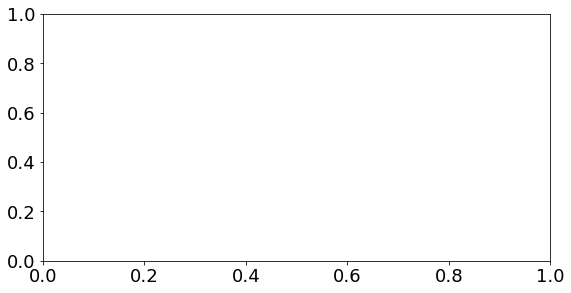

In [136]:
def best_sub_plots():
    plt.figure(figsize=(20,10))
    plt.rcParams.update({'font.size': 18, 'lines.markersize': 10})

    # Set up a 2x2 grid so we can look at 4 plots at once
    plt.subplot(2, 2, 1)

    # We will now plot a red dot to indicate the model with the largest adjusted R^2 statistic.
    # The argmax() function can be used to identify the location of the maximum point of a vector
    plt.plot(models_best["deviance"])
    plt.xlabel('# Predictors')
    plt.ylabel('prsquared')

    # We will now plot a red dot to indicate the model with the largest adjusted R^2 statistic.
    # The argmax() function can be used to identify the location of the maximum point of a vector

    rsquared_adj = models_best.apply(lambda row: row[1].rsquared_adj, axis=1)

    plt.subplot(2, 2, 2)
    plt.plot(rsquared_adj)
    plt.plot(1+rsquared_adj.argmax(), rsquared_adj.max(), "or")
    plt.xlabel('# Predictors')
    plt.ylabel('adjusted rsquared')

    # We'll do the same for AIC and BIC, this time looking for the models with the SMALLEST statistic
    aic = models_best.apply(lambda row: row[1].aic, axis=1)

    plt.subplot(2, 2, 3)
    plt.plot(aic)
    plt.plot(1+aic.argmin(), aic.min(), "or")
    plt.xlabel('# Predictors')
    plt.ylabel('AIC')

    bic = models_best.apply(lambda row: row[1].bic, axis=1)

    plt.subplot(2, 2, 4)
    plt.plot(bic)
    plt.plot(1+bic.argmin(), bic.min(), "or")
    plt.xlabel('# Predictors')
    plt.ylabel('BIC')
    
best_sub_plots()

In [109]:
best_fwd_reg_model = models_best['model'][2]
best_fwd_reg_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              defaulted   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.124e+30
Date:                Tue, 28 Feb 2023   Prob (F-statistic):               0.00
Time:                        17:11:09   Log-Likelihood:             6.6847e+05
No. Observations:               22500   AIC:                        -1.337e+06
Df Residuals:                   22497   BIC:                        -1.337e+06
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.577e-14    2.3e-16     68.722      0.000    1.53e-14    1.62e-14
defaulted      1.0000   4.91e-16   2.04e+15      0.000       1.000       1.000
limit_bal  -1.932e-16   2.05e-16     -0.944      0.345   -5.94e-16    2.08e-16
==============================================================================
Omnibus:                     4071.699   Durbin-Watson:                   2.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6713.783
Skew:                           1.333   Prob(JB):                         0.00
Kurtosis:                       2.778   Cond. No.                         2.59
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""